In [22]:
# Instalando as bibliotecas necessárias.
import pandas as pd
import matplotlib.pyplot as plt
import requests
import zipfile

In [23]:
# Definindo Máximo do Linhas e Colunas
pd.options.display.max_rows = 1000
pd.options.display.max_columns = 1000
pd.options.display.float_format = '{:.4f}'.format

In [24]:
# Removendo Warnings.
import warnings
warnings.filterwarnings("ignore")

## Código de Pesquisa de Fundos na CVM.

In [25]:
# Definindo Configuração.
ano = '2022'
mes = '12'
url = f'https://dados.cvm.gov.br/dados/FI/DOC/INF_DIARIO/DADOS/inf_diario_fi_{ano}{mes}.zip'

In [26]:
# Criando função de coleta.
down = requests.get(url)
with open(f'inf_diario_fi_{ano}{mes}.zip', 'wb') as arquivo_cvm:
  arquivo_cvm.write(down.content)
arquivo_zip = zipfile.ZipFile(f'inf_diario_fi_{ano}{mes}.zip')

## Extraindo DataFrame

In [27]:
# Código de Extração.
df = pd.read_csv(arquivo_zip.open(arquivo_zip.namelist()[0]), sep=';', encoding='ISO-8859-1')

In [28]:
# Visualizando dados.
df.head()

,TP_FUNDO,CNPJ_FUNDO,DT_COMPTC,VL_TOTAL,VL_QUOTA,VL_PATRIM_LIQ,CAPTC_DIA,RESG_DIA,NR_COTST
0,FI,00.017.024/0001-53,2022-12-01,1093517.0000,30.6738,1097086.4800,0.0000,0.0000,1
1,FI,00.017.024/0001-53,2022-12-02,1094076.5800,30.6872,1097567.8900,0.0000,0.0000,1
2,FI,00.017.024/0001-53,2022-12-05,1094638.6700,30.7007,1098050.7100,0.0000,0.0000,1
3,FI,00.017.024/0001-53,2022-12-06,1095200.3400,30.7143,1098536.0700,0.0000,0.0000,1
4,FI,00.017.024/0001-53,2022-12-07,1095464.0200,30.7279,1099020.9400,0.0000,0.0000,1


In [29]:
# Dimensão dos dados.
df.shape

(539894, 9)

## Dados de cadastro dos fundos.

In [30]:
# Informações de cadastro.
url = 'https://dados.cvm.gov.br/dados/FI/CAD/DADOS/cad_fi.csv'
cad = pd.read_csv(url, sep=';', encoding='ISO-8859-1').drop_duplicates()[['CNPJ_FUNDO','DENOM_SOCIAL']]

In [31]:
# Visualizando dados.
cad.head()

,CNPJ_FUNDO,DENOM_SOCIAL
0,00.000.684/0001-21,DEUTSCHE BANK FDO APLIC QUOTAS FDO INV FINANCE...
1,00.000.731/0001-37,ITAMARITI CASH FUNDO APLICACAO QUOTAS FDOS INV...
2,00.000.732/0001-81,FUNDO APLIC. QUOTAS DE F.I. SANTANDER CURTO PRAZO
3,00.000.740/0001-28,FUNDO DE APLIC EM QUOTAS DE FUNDOS DE INV BMC ...
4,00.000.749/0001-39,BALANCE FUNDO APLICACAO QUOTAS FUNDO INVESTIME...


## Evolução Fundo de Investimentos.

In [32]:
alaska = df[df['CNPJ_FUNDO'] == '26.648.868/0001-96']
alaska

,TP_FUNDO,CNPJ_FUNDO,DT_COMPTC,VL_TOTAL,VL_QUOTA,VL_PATRIM_LIQ,CAPTC_DIA,RESG_DIA,NR_COTST
209308,FI,26.648.868/0001-96,2022-12-01,268919888.6000,1.5819,268815333.5200,24780.0600,437926.6600,25682
209309,FI,26.648.868/0001-96,2022-12-02,272172596.2700,1.6010,272089401.3100,41883.3000,14726.2800,25683
209310,FI,26.648.868/0001-96,2022-12-05,259922808.9900,1.5364,260377322.5100,16037.2800,750579.4800,25626
209311,FI,26.648.868/0001-96,2022-12-06,263985524.7400,1.5593,264272813.6700,23132.8400,2653.4800,25633
209312,FI,26.648.868/0001-96,2022-12-07,262308884.1700,1.5548,262919671.2900,55356.5900,651180.9200,25602
209313,FI,26.648.868/0001-96,2022-12-08,255749881.9700,1.5179,256199485.6400,22419.8300,496491.8300,25575
209314,FI,26.648.868/0001-96,2022-12-09,255461233.6300,1.5187,256043202.2800,55762.4000,346629.1700,25552
209315,FI,26.648.868/0001-96,2022-12-12,241563820.2200,1.4399,242138693.2500,16427.9100,639424.7800,25486
209316,FI,26.648.868/0001-96,2022-12-13,234312483.4300,1.3953,234697436.8500,59732.5900,1401.1400,25494
209317,FI,26.648.868/0001-96,2022-12-14,233163331.0900,1.3895,233455669.9000,36461.4100,293895.1500,25461


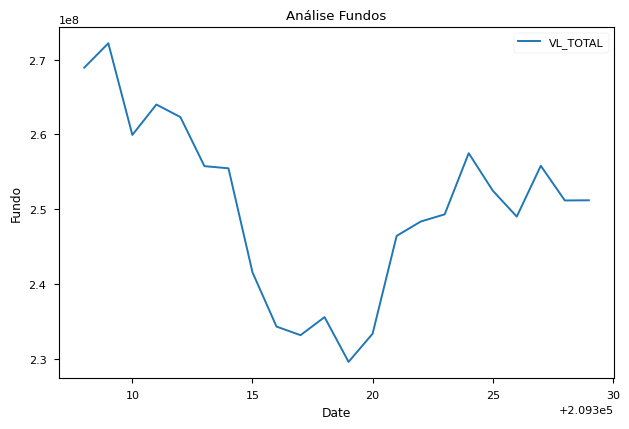

In [33]:
# Visualização gráfica das séries.
plt.style.use('seaborn-paper')
alaska['VL_TOTAL'].plot()
plt.legend(loc='best')
plt.title("Análise Fundos")
plt.xlabel('Date')
plt.ylabel('Fundo')
plt.tight_layout()
plt.show()